In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandasql as ps
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from datetime import datetime
import pandasql as ps

# PCA
from sklearn.decomposition import PCA

# ML library
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm, linear_model, metrics, tree
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.metrics import f1_score

from scipy import stats
from scipy.stats import norm


In [2]:
os.chdir("/Users/tonychu/SynologyDrive/Drive Workspace/Dissertation/datasets/")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Please change the directory to where you store the raw datasets
print("List of available files: ")
for dirname, _, filenames in os.walk('nba_stats'): 
    for filename in filenames:
        print("- ", filename)

List of available files: 
-  Team Stats Per 100 Poss.csv
-  End of Season Teams (Voting).csv
-  Team Totals.csv
-  Player Per Game.csv
-  Advanced.csv
-  .DS_Store
-  End of Season Teams.csv
-  Opponent Stats Per 100 Poss.csv
-  Player Career Info.csv
-  Player Totals.csv
-  Player Play By Play.csv
-  Player Season Info.csv
-  All-Star Selections.csv
-  Team Abbrev.csv
-  Per 36 Minutes.csv
-  Opponent Stats Per Game.csv
-  Team Summaries.csv
-  Player Shooting.csv
-  Team Stats Per Game.csv
-  Per 100 Poss.csv
-  Opponent Totals.csv
-  Player Award Shares.csv


In [4]:
player_per_game = pd.read_csv("nba_stats/Player Per Game.csv")
player_advanced_stats = pd.read_csv("nba_stats/Advanced.csv")
player_awards = pd.read_csv("nba_stats/Player Award Shares.csv")
teams_summaries = pd.read_csv("nba_stats/Team Summaries.csv")

In [5]:
player_per_game = player_per_game[(player_per_game['season'] >=1980) & (player_per_game['season'] < 2023)]
player_advanced_stats = player_advanced_stats[(player_advanced_stats['season'] >=1980) & (player_advanced_stats['season'] < 2023)]
player_awards = player_awards[(player_awards['season'] >=1980) & (player_awards['season'] < 2023)]
teams_summaries = teams_summaries[(teams_summaries['season'] >=1980) & (teams_summaries['season'] < 2023)]

In [6]:
player_per_game_raw = player_per_game.drop(columns=["birth_year","lg","g","gs"]).reset_index(drop = True)
player_per_game_raw.head(10)

,seas_id,season,player_id,player,pos,age,experience,tm,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,29646,2022,4219,Aaron Gordon,PF,26.0,8,DEN,31.7,5.8,11.1,0.520,1.2,3.5,0.335,4.6,7.7,0.605,0.573,2.3,3.1,0.743,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0
1,29647,2022,4899,Aaron Henry,SF,22.0,1,PHI,2.8,0.2,0.8,0.200,0.0,0.2,0.000,0.2,0.7,0.250,0.200,0.0,0.0,NaN,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3
2,29648,2022,4582,Aaron Holiday,PG,25.0,4,TOT,16.2,2.4,5.4,0.447,0.6,1.6,0.379,1.8,3.7,0.477,0.504,0.9,1.1,0.868,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3
3,29649,2022,4582,Aaron Holiday,PG,25.0,4,WAS,16.2,2.4,5.2,0.467,0.6,1.6,0.343,1.9,3.6,0.524,0.521,0.7,0.9,0.800,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1
4,29650,2022,4582,Aaron Holiday,PG,25.0,4,PHO,16.3,2.3,5.6,0.411,0.7,1.6,0.444,1.6,4.0,0.398,0.476,1.4,1.5,0.939,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8
5,29651,2022,4805,Aaron Nesmith,SF,22.0,2,BOS,11.0,1.4,3.5,0.396,0.6,2.2,0.270,0.8,1.3,0.612,0.481,0.4,0.5,0.808,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8
6,29652,2022,4900,Aaron Wiggins,SG,23.0,1,OKC,24.2,3.1,6.7,0.463,0.8,2.8,0.304,2.3,4.0,0.573,0.525,1.2,1.7,0.729,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3
7,29653,2022,4463,Abdel Nader,SF,28.0,5,PHO,10.4,0.9,2.5,0.343,0.3,1.0,0.286,0.6,1.5,0.381,0.400,0.4,0.7,0.600,0.3,1.6,1.9,0.5,0.6,0.3,0.8,1.4,2.4
8,29654,2022,4901,Ade Murkey,SG,24.0,1,SAC,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,29655,2022,4688,Admiral Schofield,SF,24.0,2,ORL,12.3,1.4,3.4,0.419,0.7,2.1,0.329,0.7,1.3,0.560,0.519,0.3,0.4,0.800,0.4,1.9,2.3,0.7,0.1,0.1,0.6,1.5,3.8


In [7]:
player_per_game_raw.columns

Index(['seas_id', 'season', 'player_id', 'player', 'pos', 'age', 'experience',
       'tm', 'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent',
       'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game',
       'x2pa_per_game', 'x2p_percent', 'e_fg_percent', 'ft_per_game',
       'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game',
       'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game',
       'tov_per_game', 'pf_per_game', 'pts_per_game'],
      dtype='object')

In [8]:
player_advanced_stats_raw = player_advanced_stats.drop(columns=["birth_year","lg","g","mp"]).reset_index(drop = True)
player_advanced_stats_raw.head(10)

,seas_id,season,player_id,player,pos,age,experience,tm,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,29646,2022,4219,Aaron Gordon,PF,26.0,8,DEN,15.3,0.602,0.312,0.276,6.1,14.3,10.3,11.6,0.9,1.7,12.5,19.7,3.2,2.0,5.2,0.105,0.5,-1.1,-0.6,0.9
1,29647,2022,4899,Aaron Henry,SF,22.0,1,PHI,-7.4,0.200,0.200,0.000,0.0,6.5,3.3,0.0,0.0,10.6,28.6,18.5,-0.1,0.0,-0.1,-0.306,-14.0,-2.4,-16.5,-0.1
2,29648,2022,4582,Aaron Holiday,PG,25.0,4,TOT,12.6,0.544,0.305,0.201,2.6,10.3,6.5,20.7,2.0,0.7,15.4,18.7,0.5,0.9,1.5,0.068,-1.9,0.3,-1.7,0.1
3,29649,2022,4582,Aaron Holiday,PG,25.0,4,WAS,11.3,0.547,0.313,0.164,1.5,9.5,5.6,17.1,1.8,1.2,14.5,18.0,0.1,0.4,0.5,0.038,-2.4,0.3,-2.1,0.0
4,29650,2022,4582,Aaron Holiday,PG,25.0,4,PHO,14.9,0.538,0.290,0.266,4.6,11.7,8.2,27.4,2.4,0.0,16.8,20.0,0.4,0.5,0.9,0.125,-1.0,0.3,-0.8,0.1
5,29651,2022,4805,Aaron Nesmith,SF,22.0,2,BOS,7.3,0.507,0.632,0.143,2.9,13.6,8.4,5.4,1.7,0.8,13.8,17.2,-0.4,0.9,0.4,0.038,-4.9,0.7,-4.3,-0.3
6,29652,2022,4900,Aaron Wiggins,SG,23.0,1,OKC,10.3,0.556,0.409,0.252,4.3,11.0,7.6,8.5,1.2,0.8,12.6,15.3,0.5,0.8,1.2,0.048,-3.4,-0.9,-4.3,-0.7
7,29653,2022,4463,Abdel Nader,SF,28.0,5,PHO,4.9,0.431,0.400,0.286,3.0,16.6,10.0,5.9,2.7,2.5,21.8,15.0,-0.3,0.3,0.0,-0.009,-7.1,2.2,-5.0,-0.1
8,29654,2022,4901,Ade Murkey,SG,24.0,1,SAC,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.017,-7.4,-2.3,-9.7,0.0
9,29655,2022,4688,Admiral Schofield,SF,24.0,2,ORL,7.5,0.538,0.612,0.116,3.8,16.3,10.0,7.9,0.4,1.0,13.4,14.5,-0.1,0.3,0.3,0.027,-4.2,-1.2,-5.4,-0.4


In [9]:
player_awards_raw = player_awards.drop(columns = ["first","share","pts_won","pts_max"])
mvp_candidates = player_awards_raw[player_awards_raw['award']=='nba mvp'].reset_index(drop = True)
mvp_candidates = mvp_candidates[['seas_id','player_id','season','award','player','age','tm','winner']]
mvp_candidates = mvp_candidates[mvp_candidates['tm'] != 'TOT']
mvp_candidates.head(40)

,seas_id,player_id,season,award,player,age,tm,winner
0,30247,4352,2022,nba mvp,Nikola Jokić,26,DEN,True
1,30033,4417,2022,nba mvp,Joel Embiid,27,PHI,False
2,29918,4164,2022,nba mvp,Giannis Antetokounmpo,27,MIL,False
3,29850,4321,2022,nba mvp,Devin Booker,25,PHO,False
4,30158,4654,2022,nba mvp,Luka Dončić,22,DAL,False
5,30010,4518,2022,nba mvp,Jayson Tatum,23,BOS,False
6,29959,4723,2022,nba mvp,Ja Morant,22,MEM,False
7,30348,3903,2022,nba mvp,Stephen Curry,33,GSW,False
8,29760,3585,2022,nba mvp,Chris Paul,36,PHO,False
9,29830,3872,2022,nba mvp,DeMar DeRozan,32,CHI,False


In [10]:
teams_summaries_raw = teams_summaries[["season","abbreviation","w","l","mov"]].reset_index(drop = True)
teams_summaries_raw = teams_summaries_raw[teams_summaries_raw['abbreviation'].notna()]
teams_summaries_raw.head(40)

,season,abbreviation,w,l,mov
0,2022,ATL,43.0,39.0,1.56
1,2022,BOS,51.0,31.0,7.28
2,2022,BRK,44.0,38.0,0.78
3,2022,CHI,46.0,36.0,-0.39
4,2022,CHO,43.0,39.0,0.44
5,2022,CLE,44.0,38.0,2.12
6,2022,DAL,52.0,30.0,3.30
7,2022,DEN,48.0,34.0,2.30
8,2022,DET,23.0,59.0,-7.72
9,2022,GSW,53.0,29.0,5.54


In [11]:

q1 = """SELECT 
                m.*, 
                ppg.pts_per_game, ppg.mp_per_game, ppg.fg_per_game, ppg.fga_per_game, ppg.fg_percent, ppg.x3p_per_game, ppg.x3pa_per_game, ppg.x3p_percent, ppg.x2p_per_game, ppg.x2pa_per_game, ppg.x2p_percent, ppg.e_fg_percent, ppg.ft_per_game, ppg.fta_per_game, ppg.ft_percent, ppg.orb_per_game, ppg.drb_per_game, ppg.trb_per_game, ppg.ast_per_game, ppg.stl_per_game, ppg.blk_per_game, ppg.tov_per_game, ppg.pf_per_game,	 
                pas.per, pas.usg_percent,
                ts.w, ts.l, ts.mov
        FROM mvp_candidates m
        LEFT JOIN player_per_game_raw ppg
        ON m.season = ppg.season AND m.player_id = ppg.player_id
        LEFT JOIN player_advanced_stats_raw pas
        ON m.season = pas.season AND m.player_id = pas.player_id
        LEFT JOIN teams_summaries_raw ts
        ON m.season = ts.season AND m.tm = ts.abbreviation
        
        """
merged_raw = ps.sqldf(q1, locals())
len(merged_raw)

690

In [12]:
merged_raw.head(10)

,seas_id,player_id,season,award,player,age,tm,winner,pts_per_game,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,per,usg_percent,w,l,mov
0,30247,4352,2022,nba mvp,Nikola Jokić,26,DEN,1,27.1,33.5,10.3,17.7,0.583,1.3,3.9,0.337,9.0,13.8,0.652,0.620,5.1,6.3,0.810,2.8,11.0,13.8,7.9,1.5,0.9,3.8,2.6,32.8,31.9,48.0,34.0,2.30
1,30033,4417,2022,nba mvp,Joel Embiid,27,PHI,0,30.6,33.8,9.8,19.6,0.499,1.4,3.7,0.371,8.4,15.9,0.529,0.534,9.6,11.8,0.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,31.2,37.2,51.0,31.0,2.61
2,29918,4164,2022,nba mvp,Giannis Antetokounmpo,27,MIL,0,29.9,32.9,10.3,18.6,0.553,1.1,3.6,0.293,9.2,15.0,0.616,0.582,8.3,11.4,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,32.1,34.9,51.0,31.0,3.35
3,29850,4321,2022,nba mvp,Devin Booker,25,PHO,0,26.8,34.5,9.7,20.9,0.466,2.7,7.0,0.383,7.0,13.9,0.508,0.530,4.6,5.3,0.868,0.7,4.4,5.0,4.8,1.1,0.4,2.4,2.6,21.3,32.0,64.0,18.0,7.50
4,30158,4654,2022,nba mvp,Luka Dončić,22,DAL,0,28.4,35.4,9.9,21.6,0.457,3.1,8.8,0.353,6.8,12.8,0.528,0.529,5.6,7.5,0.744,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,25.1,37.4,52.0,30.0,3.30
5,30010,4518,2022,nba mvp,Jayson Tatum,23,BOS,0,26.9,35.9,9.3,20.6,0.453,3.0,8.6,0.353,6.3,12.0,0.524,0.526,5.3,6.2,0.853,1.1,6.9,8.0,4.4,1.0,0.6,2.9,2.3,21.8,32.1,51.0,31.0,7.28
6,29959,4723,2022,nba mvp,Ja Morant,22,MEM,0,27.4,33.1,10.2,20.6,0.493,1.5,4.5,0.344,8.6,16.2,0.534,0.530,5.5,7.3,0.761,1.4,4.4,5.7,6.7,1.2,0.4,3.4,1.5,24.4,33.7,56.0,26.0,5.68
7,30348,3903,2022,nba mvp,Stephen Curry,33,GSW,0,25.5,34.5,8.4,19.1,0.437,4.5,11.7,0.380,3.9,7.4,0.527,0.554,4.3,4.7,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,21.4,30.8,53.0,29.0,5.54
8,29760,3585,2022,nba mvp,Chris Paul,36,PHO,0,14.7,32.9,5.6,11.3,0.493,1.0,3.1,0.317,4.6,8.3,0.559,0.536,2.6,3.1,0.837,0.3,4.0,4.4,10.8,1.9,0.3,2.4,2.1,20.8,19.7,64.0,18.0,7.50
9,29830,3872,2022,nba mvp,DeMar DeRozan,32,CHI,0,27.9,36.1,10.2,20.2,0.504,0.7,1.9,0.352,9.5,18.3,0.520,0.521,6.8,7.8,0.877,0.7,4.4,5.2,4.9,0.9,0.3,2.4,2.3,23.1,31.8,46.0,36.0,-0.39


In [13]:
merged_raw.loc[merged_raw['x3p_percent'].isnull(), 'x3p_percent'] = 0.0

In [14]:
merged_raw[merged_raw.isnull().any(axis=1)]

,seas_id,player_id,season,award,player,age,tm,winner,pts_per_game,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,per,usg_percent,w,l,mov


In [15]:
merged_raw[(merged_raw['winner'] == 1) & (merged_raw['season'] > 2015)]

,seas_id,player_id,season,award,player,age,tm,winner,pts_per_game,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,per,usg_percent,w,l,mov
0,30247,4352,2022,nba mvp,Nikola Jokić,26,DEN,1,27.1,33.5,10.3,17.7,0.583,1.3,3.9,0.337,9.0,13.8,0.652,0.620,5.1,6.3,0.810,2.8,11.0,13.8,7.9,1.5,0.9,3.8,2.6,32.8,31.9,48.0,34.0,2.30
12,29456,4352,2021,nba mvp,Nikola Jokić,25,DEN,1,26.4,34.6,10.2,18.0,0.566,1.3,3.3,0.388,8.9,14.7,0.606,0.602,4.8,5.5,0.868,2.8,8.0,10.8,8.3,1.3,0.7,3.1,2.7,31.3,29.6,47.0,25.0,4.93
25,28507,4164,2020,nba mvp,Giannis Antetokounmpo,25,MIL,1,29.5,30.4,10.9,19.7,0.553,1.4,4.7,0.304,9.5,15.0,0.631,0.589,6.3,10.0,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,31.9,37.5,56.0,17.0,10.08
37,27809,4164,2019,nba mvp,Giannis Antetokounmpo,24,MIL,1,27.7,32.8,10.0,17.3,0.578,0.7,2.8,0.256,9.3,14.5,0.641,0.599,6.9,9.5,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,30.9,32.3,60.0,22.0,8.87
49,27201,3880,2018,nba mvp,James Harden,28,HOU,1,30.4,35.4,9.0,20.1,0.449,3.7,10.0,0.367,5.4,10.1,0.531,0.541,8.7,10.1,0.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,29.8,36.1,65.0,17.0,8.48
62,26815,3849,2017,nba mvp,Russell Westbrook,28,OKC,1,31.6,34.6,10.2,24.0,0.425,2.5,7.2,0.343,7.7,16.8,0.459,0.476,8.8,10.4,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,30.6,41.7,47.0,35.0,0.76
73,26260,3903,2016,nba mvp,Stephen Curry,27,GSW,1,30.1,34.2,10.2,20.2,0.504,5.1,11.2,0.454,5.1,9.0,0.566,0.630,4.6,5.1,0.908,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,31.5,32.6,73.0,9.0,10.76


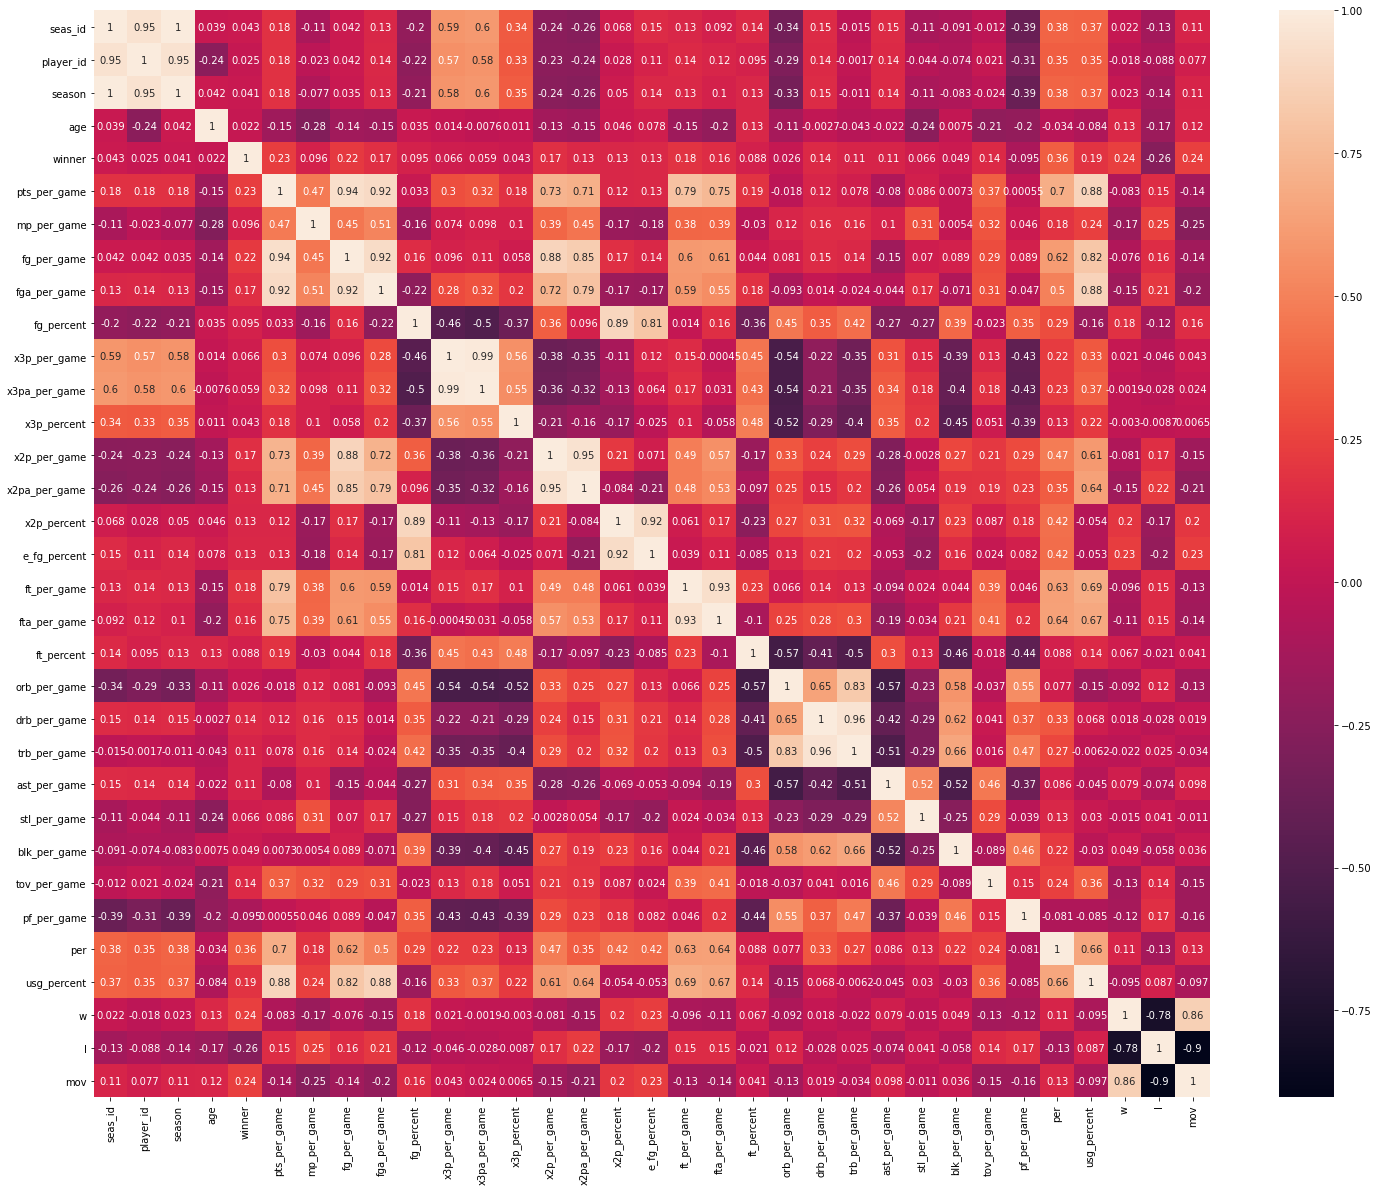

In [16]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(merged_raw.corr(), annot=True)
plt.savefig("Heatmap.png")

In [17]:
train_original = merged_raw.loc[(merged_raw['season']<=2015),:]
test_original = merged_raw.loc[(merged_raw['season']>2015),:]
# X_train = train.drop('winner', axis=1).reset_index(drop = True)
# y_train = train['winner'].reset_index(drop = True)
# X_test = test.drop('winner', axis=1).reset_index(drop = True)
# y_test = test['winner'].reset_index(drop = True)
# X_train = X_train.drop(columns=['seas_id','player_id','season','award','player','tm','e_fg_percent']).reset_index(drop = True)
# X_test = X_test.drop(columns=['seas_id','player_id','season','award','player','tm','e_fg_percent']).reset_index(drop = True)

In [18]:
X_train_original = train_original.drop(columns=['seas_id','player_id','season','award','player','tm','e_fg_percent','winner']).reset_index(drop = True)
y_train = train_original['winner'].reset_index(drop = True)
X_test_original = test_original.drop(columns=['seas_id','player_id','season','award','player','tm','e_fg_percent','winner']).reset_index(drop = True)
y_test = test_original['winner'].reset_index(drop = True)

In [19]:

scaler = MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train_original))
X_train.columns=X_train_original.columns
X_test=pd.DataFrame(scaler.fit_transform(X_test_original))
X_train.columns=X_test_original.columns

In [20]:
### Random Forest ###
curr_score = -1
best_n = -1
max_n = [10**i for i in range(1,5)]
max_feature = [i for i in range(1,10)]
best_f = -1

for n in max_n:
    for f in max_feature:
        random_forest_model = RandomForestClassifier(n_estimators = n, random_state=42, max_features=f)
        random_forest_model.fit(X_train.values,y_train)
        y_predict = random_forest_model.predict(X_test)
        score = accuracy_score(y_predict,y_test)
        if curr_score < score:
            curr_score = score
            best_n = n
            best_f = f


random_forest_model = RandomForestClassifier(n_estimators = best_n, random_state=42, max_features=best_f)
random_forest_model = random_forest_model.fit(X_train.values,y_train)
#p_values = chi2(X_train, y_train)[1]
#rf_table = pd.DataFrame({'coef':random_forest_model.feature_importances_,'p_value': p_values}, index=X_train.columns).sort_values(by='coef',ascending=False)
#rf_table['coef'].head(10).plot(kind='bar')
#plt.title("Random Forest")


#rf_accuracy = random_forest_model.score(X_test, y_test)
y_predict = random_forest_model.predict(X_test)
#rf_accuracy = accuracy_score(y_predict, y_test)
rf_mse = mean_squared_error(y_test, y_predict)
#rf_f1 = f1_score(y_test, y_predict)
#rf_precision = precision_score(y_test, y_predict)

In [21]:
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
random_forest_model

RandomForestClassifier(max_features=3, n_estimators=10, random_state=42)

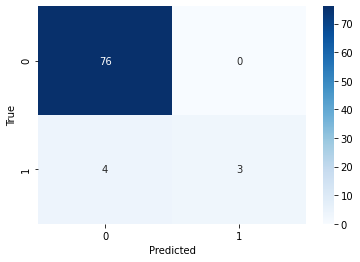

<ipython-input-23-870e71a55974>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rf['predicted'] = y_predict


,seas_id,player_id,season,award,player,age,tm,winner,predicted
25,28507,4164,2020,nba mvp,Giannis Antetokounmpo,25,MIL,1,1
49,27201,3880,2018,nba mvp,James Harden,28,HOU,1,1
73,26260,3903,2016,nba mvp,Stephen Curry,27,GSW,1,1


In [23]:
#print(rf_mse)
#rf_table[rf_table['p_value'] <= 0.05]

conf_matrix = confusion_matrix(y_test, y_predict)
tn, fp, fn, tp = conf_matrix.ravel()
rf_accuracy = (tp + tn) / (tp + tn + fp + fn)
rf_precision = tp / (tp + fp)
rf_recall = tp / (tp + fn)
rf_FNR = fn / (fn + tp)
rf_f1 = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
test_rf = test_original
test_rf['predicted'] = y_predict
test_rf = test_rf[["seas_id",	"player_id", "season", "award",	"player", "age", "tm", "winner", "predicted"]]
test_rf = test_rf.astype({'predicted':int})
test_rf[(test_rf['winner'] == 1) & test_rf['predicted'] == 1]

In [24]:
### Support Vector Machine ###
curr_score = -1
best_c = -1
cs = [10**i for i in range(6)]
best_gamma = -1
gamma_range = [10**i for i in range(-3,6)]
kernels = ["linear","rbf", "poly","sigmoid"]
best_ker = ""

for c in cs:
    for k in range(len(kernels)):
        for g in gamma_range:
            clf = svm.SVC(kernel=kernels[k], C=c, gamma=g)

        # Train the model on your data
            clf.fit(X_train.values, y_train)

            y_predict = clf.predict(X_test)
            #score = clf.score(X_train,y_train)
            score = accuracy_score(y_predict,y_test)
            if curr_score < score:
                curr_score = score
                best_c = c
                best_ker = k
                best_gamma = g
# Predict on new data


clf = svm.SVC(C=best_c, kernel=kernels[best_ker], gamma = best_gamma)
clf.fit(X_train.values,y_train)
y_predict = clf.predict(X_test)
#svm_accuracy = accuracy_score(y_test, y_predict)
svm_mse = mean_squared_error(y_test, y_predict)
#svm_f1 = f1_score(y_test, y_predict)
#svm_precision = precision_score(y_test, y_predict)

In [25]:
clf.intercept_

array([0.24029803])

In [26]:
kernels[best_ker]

'rbf'

In [27]:
clf

SVC(C=10, gamma=0.1)

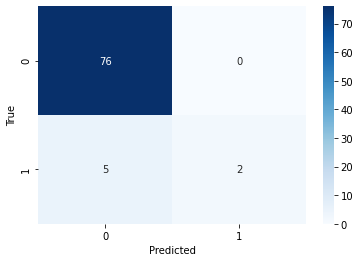

<ipython-input-28-8fd4618f505b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_svm['predicted'] = y_predict


,seas_id,player_id,season,award,player,age,tm,winner,predicted
49,27201,3880,2018,nba mvp,James Harden,28,HOU,1,1
73,26260,3903,2016,nba mvp,Stephen Curry,27,GSW,1,1


In [28]:

conf_matrix = confusion_matrix(y_test, y_predict)
tn, fp, fn, tp = conf_matrix.ravel()
svm_accuracy = (tp + tn) / (tp + tn + fp + fn)
svm_precision = tp / (tp + fp)
svm_recall = tp / (tp + fn)
svm_FNR = fn / (fn + tp)
svm_f1 = 2 * (svm_precision * svm_recall) / (svm_precision + svm_recall)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
test_svm = test_original
test_svm['predicted'] = y_predict
test_svm = test_svm[["seas_id",	"player_id", "season", "award",	"player", "age", "tm", "winner", "predicted"]]
test_svm = test_svm.astype({'predicted':int})
test_svm[(test_svm['winner'] == 1) & test_svm['predicted'] == 1]

In [29]:
test_svm[(test_svm['winner'] == 1) & (test_svm['predicted'] == 0)]

,seas_id,player_id,season,award,player,age,tm,winner,predicted
0,30247,4352,2022,nba mvp,Nikola Jokić,26,DEN,1,0
12,29456,4352,2021,nba mvp,Nikola Jokić,25,DEN,1,0
25,28507,4164,2020,nba mvp,Giannis Antetokounmpo,25,MIL,1,0
37,27809,4164,2019,nba mvp,Giannis Antetokounmpo,24,MIL,1,0
62,26815,3849,2017,nba mvp,Russell Westbrook,28,OKC,1,0


In [30]:
### Decision Tree ###
curr_score = -1
best_node = -1
max_node = [10**i for i in range(1,8)]


for node in max_node:

    dt_model = tree.DecisionTreeClassifier(max_leaf_nodes = node)
    dt_model = dt_model.fit(X_train.values, y_train)
    y_predict = dt_model.predict(X_test)
    score = accuracy_score(y_test, y_predict)
    if curr_score < score:
        curr_score = score
        best_node = node


dt_model = tree.DecisionTreeClassifier(max_leaf_nodes = best_node)
dt_model = dt_model.fit(X_train.values, y_train)
y_predict = dt_model.predict(X_test)


#dc_accuracy = accuracy_score(y_test, y_predict)
dc_mse = mean_squared_error(y_test, y_predict)
#dc_f1 = f1_score(y_test, y_predict)
#dc_precision = precision_score(y_test, y_predict)

In [31]:
dt_model

DecisionTreeClassifier(max_leaf_nodes=10)

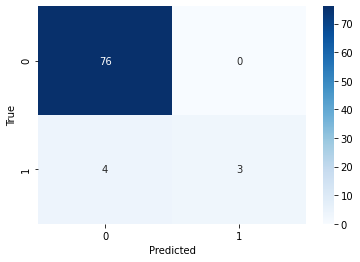

<ipython-input-32-c97b218738d6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dc['predicted'] = y_predict


,seas_id,player_id,season,award,player,age,tm,winner,predicted
0,30247,4352,2022,nba mvp,Nikola Jokić,26,DEN,1,1
49,27201,3880,2018,nba mvp,James Harden,28,HOU,1,1
73,26260,3903,2016,nba mvp,Stephen Curry,27,GSW,1,1


In [32]:

conf_matrix = confusion_matrix(y_test, y_predict)
tn, fp, fn, tp = conf_matrix.ravel()
dc_accuracy = (tp + tn) / (tp + tn + fp + fn)
dc_precision = tp / (tp + fp)
dc_recall = tp / (tp + fn)
dc_FNR = fn / (fn + tp)
dc_f1 = 2 * (dc_precision * dc_recall) / (dc_precision + dc_recall)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
test_dc = test_original
test_dc['predicted'] = y_predict
test_dc = test_dc[["seas_id",	"player_id", "season", "award",	"player", "age", "tm", "winner", "predicted"]]
test_dc = test_dc.astype({'predicted':int})
test_dc[(test_dc['winner'] == 1) & test_dc['predicted'] == 1]
# columns = ['coef', 'p_value']
# data = np.array([coef, p_values]).T
# df = pd.DataFrame(data, columns=columns)
# df['predictor'] = X_train.columns
# df = df[['predictor','coef','p_value']]
# df.sort_values('p_value',ascending = True)

In [33]:

### Comparison ###
method = ['Random Forest', 'Support Vector Machine', 'Decision Tree']
accuracy = [rf_accuracy, svm_accuracy, dc_accuracy]
precision = [rf_precision, svm_precision, dc_precision]
recall = [rf_recall,svm_recall,dc_recall]
fnr = [rf_FNR,svm_FNR,dc_FNR]
f1_score = [rf_f1, svm_f1, dc_f1]
MSE = [rf_mse, svm_mse, dc_mse]
comparison = pd.DataFrame(
    {
     'accuracy': accuracy,
     'precision': precision,
     'recall': recall,
     'FNR':fnr,
     'MSE': MSE,
     'F1 Score': f1_score
    },index=method)
comparison


,accuracy,precision,recall,FNR,MSE,F1 Score
Random Forest,0.951807,1.0,0.428571,0.571429,0.048193,0.600000
Support Vector Machine,0.939759,1.0,0.285714,0.714286,0.060241,0.444444
Decision Tree,0.951807,1.0,0.428571,0.571429,0.048193,0.600000


Apply PCA to improve the model

In [34]:
train_original = merged_raw.loc[(merged_raw['season']<=2015),:]
test_original = merged_raw.loc[(merged_raw['season']>2015),:]
X_train = train_original.drop(columns=['seas_id','player_id','season','award','player','tm','e_fg_percent','winner']).reset_index(drop = True)
y_train = train_original['winner'].reset_index(drop = True)
X_test = test_original.drop(columns=['seas_id','player_id','season','award','player','tm','e_fg_percent','winner']).reset_index(drop = True)
y_test = test_original['winner'].reset_index(drop = True)

scaler = MinMaxScaler()
stats_scaled_train=pd.DataFrame(scaler.fit_transform(X_train))
stats_scaled_train.columns=X_train.columns
stats_scaled_test=pd.DataFrame(scaler.fit_transform(X_test))
stats_scaled_test.columns=X_test.columns

In [35]:
n_components=stats_scaled_train.shape[1]
pca = PCA(n_components=n_components, random_state=123)
pca.fit(stats_scaled_train)

PCA(n_components=28, random_state=123)

In [36]:
explained_variance_ratio = pca.explained_variance_ratio_ 
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
lst = []
for i in range (0, n_components):
    lst.append([i+1, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])

pca_predictor = pd.DataFrame(lst)
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.281012,0.281012
1,2,0.226626,0.507638
2,3,0.098465,0.606102
3,4,0.079294,0.685396
4,5,0.065695,0.751091
5,6,0.043784,0.794876
6,7,0.036374,0.831249
7,8,0.031629,0.862878
8,9,0.024865,0.887742
9,10,0.021218,0.908960


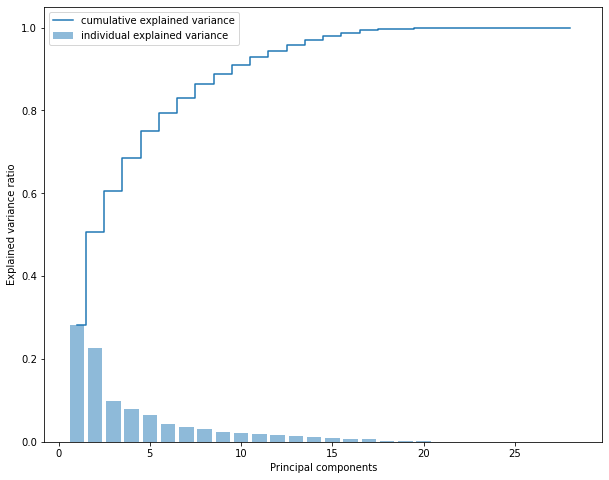

In [37]:
plt.subplots(figsize=(10,8))

plt.bar(pca_predictor['Component'],pca_predictor['Explained Variance'], align='center', alpha=0.5, 
       label='individual explained variance')
plt.step(pca_predictor['Component'],pca_predictor['Cumulative Explained Variance'], where='mid',
         label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')

In [38]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(stats_scaled_train)
X_test_pca = pca.fit_transform(stats_scaled_test)

<AxesSubplot:>

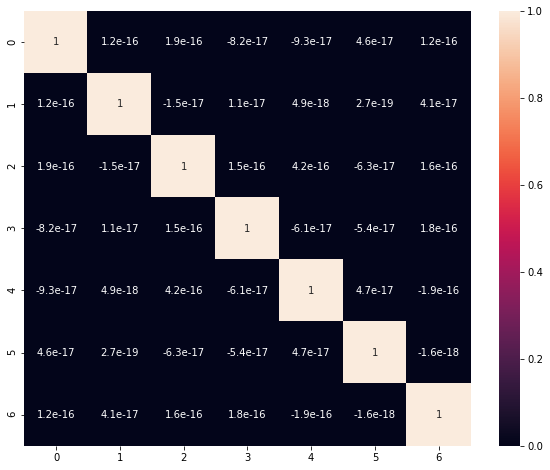

In [39]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_pca).corr(), 
            annot=True)

In [40]:
top_features = 10
for i in range(pca.components_.shape[0]):
    most_important = np.argsort(pca.components_[i])[-top_features:]
    print(f"The top {top_features} features that contribute the most to principal component {i} are:")
    print([stats_scaled_train.columns[i] for i in most_important])

The top 10 features that contribute the most to principal component 0 are:
['per', 'pf_per_game', 'x2p_percent', 'x2pa_per_game', 'fg_percent', 'blk_per_game', 'orb_per_game', 'x2p_per_game', 'drb_per_game', 'trb_per_game']
The top 10 features that contribute the most to principal component 1 are:
['trb_per_game', 'pf_per_game', 'stl_per_game', 'age', 'blk_per_game', 'orb_per_game', 'x2p_percent', 'fg_percent', 'w', 'mov']
The top 10 features that contribute the most to principal component 2 are:
['orb_per_game', 'fga_per_game', 'tov_per_game', 'stl_per_game', 'x2p_per_game', 'ast_per_game', 'age', 'x2pa_per_game', 'mp_per_game', 'l']
The top 10 features that contribute the most to principal component 3 are:
['mp_per_game', 'orb_per_game', 'x3p_per_game', 'x3pa_per_game', 'stl_per_game', 'trb_per_game', 'drb_per_game', 'tov_per_game', 'ast_per_game', 'pf_per_game']
The top 10 features that contribute the most to principal component 4 are:
['x3pa_per_game', 'x3p_per_game', 'tov_per_game

In [41]:
stats_transformed = pca.fit_transform(stats_scaled_train)
stats_transformed.shape

(607, 7)

In [42]:
stats_scaled_train.head(20)

,age,pts_per_game,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,per,usg_percent,w,l,mov
0,0.368421,0.589506,0.452736,0.543860,0.543568,0.360140,1.000000,0.931034,0.443,0.238938,0.224576,0.468165,0.333333,0.245763,0.935361,0.059701,0.223214,0.142857,0.503650,0.514286,0.035714,0.578947,0.323529,0.828704,0.689873,0.907407,0.092593,0.894840
1,0.315789,0.700617,0.656716,0.526316,0.597510,0.195804,0.722222,0.793103,0.375,0.309735,0.334746,0.288390,0.843750,0.754237,0.847909,0.089552,0.321429,0.226190,0.452555,0.485714,0.125000,0.815789,0.500000,0.768519,0.765823,0.703704,0.296296,0.567568
2,0.578947,0.635802,0.621891,0.614035,0.614108,0.363636,0.472222,0.563218,0.354,0.477876,0.432203,0.498127,0.489583,0.542373,0.547529,0.059701,0.375000,0.244048,0.481752,0.400000,0.125000,0.789474,0.323529,0.731481,0.797468,0.648148,0.351852,0.618673
3,0.368421,0.722222,0.537313,0.649123,0.759336,0.146853,0.361111,0.494253,0.299,0.548673,0.605932,0.202247,0.770833,0.720339,0.785171,0.238806,0.383929,0.321429,0.569343,0.542857,0.035714,0.921053,0.529412,0.879630,0.990506,0.500000,0.500000,0.505651
4,0.105263,0.608025,0.621891,0.649123,0.576763,0.527972,0.000000,0.022989,0.083,0.663717,0.597458,0.513109,0.500000,0.466102,0.728137,0.328358,0.589286,0.494048,0.102190,0.371429,0.517857,0.131579,0.352941,0.958333,0.655063,0.500000,0.500000,0.437346
5,0.526316,0.444444,0.557214,0.429825,0.439834,0.353147,0.472222,0.494253,0.398,0.292035,0.279661,0.449438,0.291667,0.220339,0.908745,0.044776,0.258929,0.160714,0.686131,0.485714,0.035714,0.368421,0.470588,0.736111,0.525316,0.703704,0.296296,0.722359
6,0.526316,0.577160,0.587065,0.640351,0.672199,0.286713,0.138889,0.172414,0.352,0.610619,0.639831,0.269663,0.375000,0.322034,0.804183,0.328358,0.589286,0.494048,0.065693,0.142857,0.178571,0.210526,0.264706,0.587963,0.731013,0.611111,0.388889,0.606388
7,0.578947,0.391975,0.477612,0.394737,0.394191,0.384615,0.000000,0.022989,0.176,0.407080,0.406780,0.363296,0.375000,0.347458,0.709125,0.164179,0.473214,0.351190,0.218978,0.200000,0.285714,0.342105,0.500000,0.537037,0.553797,0.685185,0.314815,0.557740
8,0.315789,0.530864,0.577114,0.578947,0.556017,0.412587,0.027778,0.045977,0.400,0.575221,0.563559,0.378277,0.406250,0.432203,0.581749,0.238806,0.410714,0.339286,0.328467,0.200000,0.089286,0.368421,0.588235,0.587963,0.674051,0.703704,0.296296,0.722359
9,1.000000,0.283951,0.263682,0.298246,0.286307,0.447552,0.000000,0.011494,0.286,0.309735,0.300847,0.415730,0.239583,0.228814,0.604563,0.283582,0.517857,0.428571,0.160584,0.171429,0.357143,0.210526,0.352941,0.578704,0.477848,0.685185,0.314815,0.703194


In [43]:
# train = merged_raw.loc[(merged_raw['season']<=2015),:]
# test = merged_raw.loc[(merged_raw['season']>2015),:]


# X_train = stats_scaled_train.drop('winner', axis=1).reset_index(drop = True)
# y_train = stats_scaled_train['winner'].reset_index(drop = True)
# X_test = stats_scaled_test.drop('winner', axis=1).reset_index(drop = True)
# y_test = stats_scaled_test['winner'].reset_index(drop = True)

X_train = pd.DataFrame(X_train_pca)
X_test = pd.DataFrame(X_test_pca)

check collinearity of the data. This is because if rows or columns are proportionally interrelated to each other, it will lead the covariance matrix toward singularity and will cause no-solution when solving the inverse matrix in regression model

In [44]:
X_corr = X_train.corr()
corr_names = set()
for i in range(len(X_corr .columns)):
    for j in range(i):
        if abs(X_corr.iloc[i, j]) > 0.85:
            col = X_corr.columns[i]
            corr_names.add(col)


In [45]:
len(X_train.columns)

7

In [46]:
len(X_test.columns)

7

In [47]:
X_train.drop(columns=corr_names,inplace=True)
X_test.drop(columns=corr_names,inplace=True)

In [48]:
len(y_train)

607

### Logistic Regression ###

In [49]:
# curr_score = -1
# best_iter = -1
# max_iter = [10**i for i in range(0,5)]

# X_train = X_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)

# for iter in max_iter:

#     lr = LogisticRegression(max_iter = iter, fit_intercept=True)
#     #lr = LogisticRegression(solver = solvers[s])
#     lr.fit(X_train.values,y_train)
#     y_pred_lr = lr.predict(X_test)
#     score = accuracy_score(y_pred_lr,y_test)
#     if curr_score < score:
#         curr_score = score
#         best_iter = iter
#         best_solver = s


# lr = LogisticRegression(max_iter = best_iter, fit_intercept=True)
# #lr = LogisticRegression(max_iter = best_iter, solver = solvers[best_solver])
# lr_model = lr.fit(X_train.values,y_train)

# coef = lr_model.coef_[0]
# intercept = lr_model.intercept_[0]
# p_values = 2 * (1 - stats.norm.cdf(np.abs(coef)))

# columns = ['coef', 'p_value']
# data = np.array([coef, p_values]).T
# lr_df = pd.DataFrame(data, columns=columns)
# lr_df['component'] = X_train.columns
# lr_df = lr_df[['component','coef','p_value']]

# lr_accuracy = lr_model.score(X_test, y_test)
# y_predict = lr_model.predict(X_test)
# lr_mse = mean_squared_error(y_test, y_predict)


In [50]:
# print(best_iter)
# lr_df[lr_df['p_value']<=0.05]

In [51]:
# conf_matrix = confusion_matrix(y_test, y_predict)
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [52]:
# test_ls = test_original
# test_ls['predicted'] = y_predict
# test_ls = test_ls[["seas_id",	"player_id", "season", "award",	"player", "age", "tm", "winner", "predicted"]]
# test_ls = test_ls.astype({'predicted':int})
# test_ls[(test_ls['winner'] == 1) & test_ls['predicted'] == 1]

### Random Forest ###

In [53]:
curr_score = -1
best_n = -1
max_n = [10**i for i in range(1,5)]
max_feature = [i for i in range(1,10)]
best_f = -1

for n in max_n:
    for f in max_feature:

        random_forest_model = RandomForestClassifier(n_estimators = n, random_state=42, max_features=f)
        random_forest_model.fit(X_train.values,y_train)
        y_predict = random_forest_model.predict(X_test)
        score = accuracy_score(y_predict,y_test)
        if curr_score < score:
            curr_score = score
            best_n = n
            best_f = f


random_forest_model = RandomForestClassifier(n_estimators = best_n, random_state=42, max_features=best_f)
random_forest_model = random_forest_model.fit(X_train.values,y_train)
# p_values = chi2(X_train, y_train)[1]
# rf_table = pd.DataFrame({'coef':random_forest_model.feature_importances_,'p_value': p_values}, index=X_train.columns).sort_values(by='coef',ascending=False)
# rf_table['coef'].head(10).plot(kind='bar')
# plt.title("Random Forest")


#rf_accuracy = random_forest_model.score(X_test, y_test)
y_predict = random_forest_model.predict(X_test)
#rf_accuracy = accuracy_score(y_predict, y_test)
rf_mse = mean_squared_error(y_test, y_predict)
#rf_f1 = f1_score(y_test, y_predict)
#rf_precision = precision_score(y_test, y_predict)

In [54]:
random_forest_model

RandomForestClassifier(max_features=4, n_estimators=10, random_state=42)

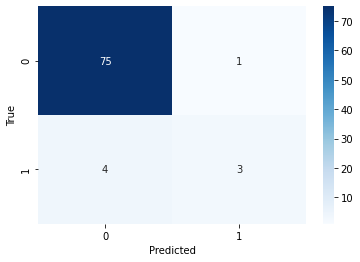

In [55]:
conf_matrix = confusion_matrix(y_test, y_predict)
tn, fp, fn, tp = conf_matrix.ravel()
rf_accuracy = (tp + tn) / (tp + tn + fp + fn)
rf_precision = tp / (tp + fp)
rf_recall = tp / (tp + fn)
rf_FNR = fn / (fn + tp)
rf_f1 = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [56]:
test_rf = test_original
test_rf['predicted'] = y_predict
test_rf = test_rf[["seas_id",	"player_id", "season", "award",	"player", "age", "tm", "winner", "predicted"]]
test_rf = test_rf.astype({'predicted':int})
test_rf[(test_rf['winner'] == 1) & test_rf['predicted'] == 1]

<ipython-input-56-8e15b11beafb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rf['predicted'] = y_predict


,seas_id,player_id,season,award,player,age,tm,winner,predicted
25,28507,4164,2020,nba mvp,Giannis Antetokounmpo,25,MIL,1,1
37,27809,4164,2019,nba mvp,Giannis Antetokounmpo,24,MIL,1,1
49,27201,3880,2018,nba mvp,James Harden,28,HOU,1,1


### Support Vector Machine ###

In [58]:
curr_score = -1
best_c = -1
cs = [10**i for i in range(5)]
kernels = ["linear","poly", "rbf", "sigmoid"]
best_gamma = -1
gamma_range = [10**i for i in range(-3,6)]
best_ker = ""

for c in cs:
    for k in range(len(kernels)):
        for g in gamma_range:
            clf = svm.SVC(kernel=kernels[k], C=c, gamma=g)

        # Train the model on your data
            clf.fit(X_train.values, y_train)

            y_predict = clf.predict(X_test)
            #score = clf.score(X_train,y_train)
            score = accuracy_score(y_predict,y_test)
            if curr_score < score:
                curr_score = score
                best_c = c
                best_ker = k
                best_gamma = g
# Predict on new data


clf = svm.SVC(C=best_c,kernel=kernels[best_ker],gamma = best_gamma)
clf.fit(X_train.values,y_train)
y_predict = clf.predict(X_test)
#svm_accuracy = accuracy_score(y_test, y_predict)
svm_mse = mean_squared_error(y_test, y_predict)
#svm_f1 = f1_score(y_test, y_predict)
#svm_precision = precision_score(y_test, y_predict)

In [59]:
clf.intercept_

array([-1.8740695])

In [60]:
clf

SVC(C=1, gamma=0.001, kernel='linear')

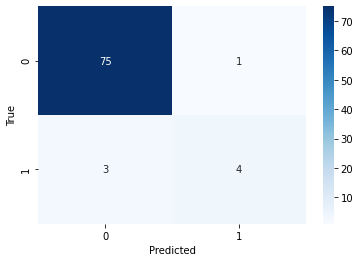

In [61]:
conf_matrix = confusion_matrix(y_test, y_predict)
tn, fp, fn, tp = conf_matrix.ravel()
svm_accuracy = (tp + tn) / (tp + tn + fp + fn)
svm_precision = tp / (tp + fp)
svm_recall = tp / (tp + fn)
svm_FNR = fn / (fn + tp)
svm_f1 = 2 * (svm_precision * svm_recall) / (svm_precision + svm_recall)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [62]:
test_svm = test_original
test_svm['predicted'] = y_predict
test_svm = test_svm[["seas_id",	"player_id", "season", "award",	"player", "age", "tm", "winner", "predicted"]]
test_svm = test_svm.astype({'predicted':int})
test_svm[(test_svm['winner'] == 1) & test_svm['predicted'] == 1]

<ipython-input-62-af076bb2c3f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_svm['predicted'] = y_predict


,seas_id,player_id,season,award,player,age,tm,winner,predicted
25,28507,4164,2020,nba mvp,Giannis Antetokounmpo,25,MIL,1,1
37,27809,4164,2019,nba mvp,Giannis Antetokounmpo,24,MIL,1,1
49,27201,3880,2018,nba mvp,James Harden,28,HOU,1,1
73,26260,3903,2016,nba mvp,Stephen Curry,27,GSW,1,1


### Decision Tree ###

In [63]:
curr_score = -1
best_node = -1
max_node = [10**i for i in range(1,8)]


for node in max_node:

    dt_model = tree.DecisionTreeClassifier(max_leaf_nodes = node)
    dt_model = dt_model.fit(X_train.values, y_train)
    y_predict = dt_model.predict(X_test)
    score = accuracy_score(y_test, y_predict)
    if curr_score < score:
        curr_score = score
        best_node = node


dt_model = tree.DecisionTreeClassifier(max_leaf_nodes = best_node)
dt_model = dt_model.fit(X_train.values, y_train)
y_predict = dt_model.predict(X_test)


#dc_accuracy = accuracy_score(y_test, y_predict)
dc_mse = mean_squared_error(y_test, y_predict)
#dc_f1 = f1_score(y_test, y_predict)
#dc_precision = precision_score(y_test, y_predict)

In [64]:
dt_model

DecisionTreeClassifier(max_leaf_nodes=10)

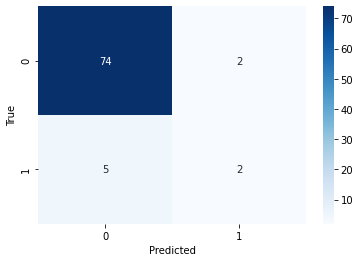

In [65]:
conf_matrix = confusion_matrix(y_test, y_predict)

tn, fp, fn, tp = conf_matrix.ravel()
dc_accuracy = (tp + tn) / (tp + tn + fp + fn)
dc_precision = tp / (tp + fp)
dc_recall = tp / (tp + fn)
dc_FNR = fn / (fn + tp)
dc_f1 = 2 * (dc_precision * dc_recall) / (dc_precision + dc_recall)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [66]:
test_dc = test_original
test_dc['predicted'] = y_predict
test_dc = test_dc[["seas_id",	"player_id", "season", "award",	"player", "age", "tm", "winner", "predicted"]]
test_dc = test_dc.astype({'predicted':int})
test_dc[(test_dc['winner'] == 1) & test_dc['predicted'] == 1]

<ipython-input-66-a0101e8edb1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dc['predicted'] = y_predict


,seas_id,player_id,season,award,player,age,tm,winner,predicted
25,28507,4164,2020,nba mvp,Giannis Antetokounmpo,25,MIL,1,1
37,27809,4164,2019,nba mvp,Giannis Antetokounmpo,24,MIL,1,1


In [67]:
# columns = ['coef', 'p_value']
# data = np.array([coef, p_values]).T
# df = pd.DataFrame(data, columns=columns)
# df['component'] = X_train.columns
# df = df[['component','coef','p_value']]

In [68]:
# df.sort_values('p_value',ascending = True)

### Comparison ###

In [69]:

### Comparison ###
method = ['Random Forest', 'Support Vector Machine', 'Decision Tree']
accuracy = [rf_accuracy, svm_accuracy, dc_accuracy]
precision = [rf_precision, svm_precision, dc_precision]
recall = [rf_recall,svm_recall,dc_recall]
fnr = [rf_FNR,svm_FNR,dc_FNR]
f1_score = [rf_f1, svm_f1, dc_f1]
MSE = [rf_mse, svm_mse, dc_mse]
comparison = pd.DataFrame(
    {
     'accuracy': accuracy,
     'precision': precision,
     'recall': recall,
     'FNR':fnr,
     'MSE': MSE,
     'F1 Score': f1_score
    },index=method)
comparison


,accuracy,precision,recall,FNR,MSE,F1 Score
Random Forest,0.939759,0.75,0.428571,0.571429,0.060241,0.545455
Support Vector Machine,0.951807,0.80,0.571429,0.428571,0.048193,0.666667
Decision Tree,0.915663,0.50,0.285714,0.714286,0.084337,0.363636
